In [9]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

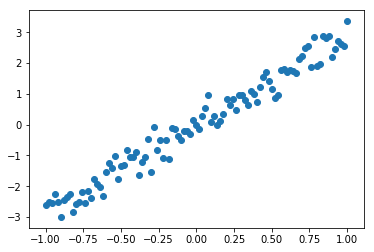

In [12]:
x_train=np.linspace(-1,1,101)
y_train = 3 * x_train + np.random.randn(*x_train.shape) * 0.33
%matplotlib inline
plt.scatter(x_train,y_train)
plt.show()

In [52]:
X=tf.placeholder('float')
Y=tf.placeholder('float')
w=tf.Variable(0.0,name='weights')
b=tf.Variable(0.0,name='bias')
learning_rate=0.001
num_iterations=100
cost_history = np.empty(shape=[1],dtype=float)


init=tf.global_variables_initializer()


In [53]:
y_model=tf.add(tf.multiply(X,w) ,b)

In [54]:
cost=tf.pow(Y-y_model,2)


train_op=tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)


the theta is -  2.86964
the bias is - 0.00488384


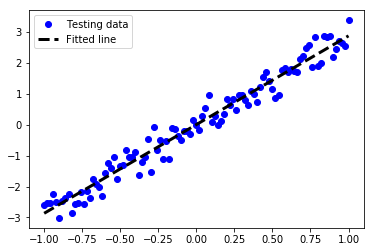

In [65]:
with tf.Session() as sess:
    sess.run(init)
    for i in range(num_iterations):
        for (x,y) in zip(x_train,y_train):
            sess.run(train_op,feed_dict={X:x,Y:y})
            cost_history = np.append(cost_history,sess.run(cost,feed_dict={X: x,Y: y}))
    print("the theta is - ",sess.run(w))
    print("the bias is -",sess.run(b))
    plt.plot(x_train, y_train, 'bo', label='Testing data')
    plt.plot(x_train, sess.run(w) *x_train + sess.run(b),"k--",lw=3, label='Fitted line')
    plt.legend()
    plt.show()

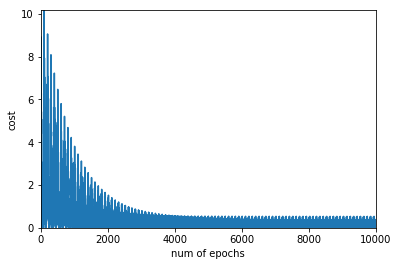

In [51]:
fig, ax = plt.subplots()

ax.plot(range(len(cost_history)),cost_history)
ax.axis([0,10000,0,np.max(cost_history)])
ax.set_xlabel('num of epochs')
ax.set_ylabel('cost')
plt.show()